-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.0     √ purrr   0.3.4
√ tibble  3.0.1     √ dplyr   1.0.0
√ tidyr   1.1.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



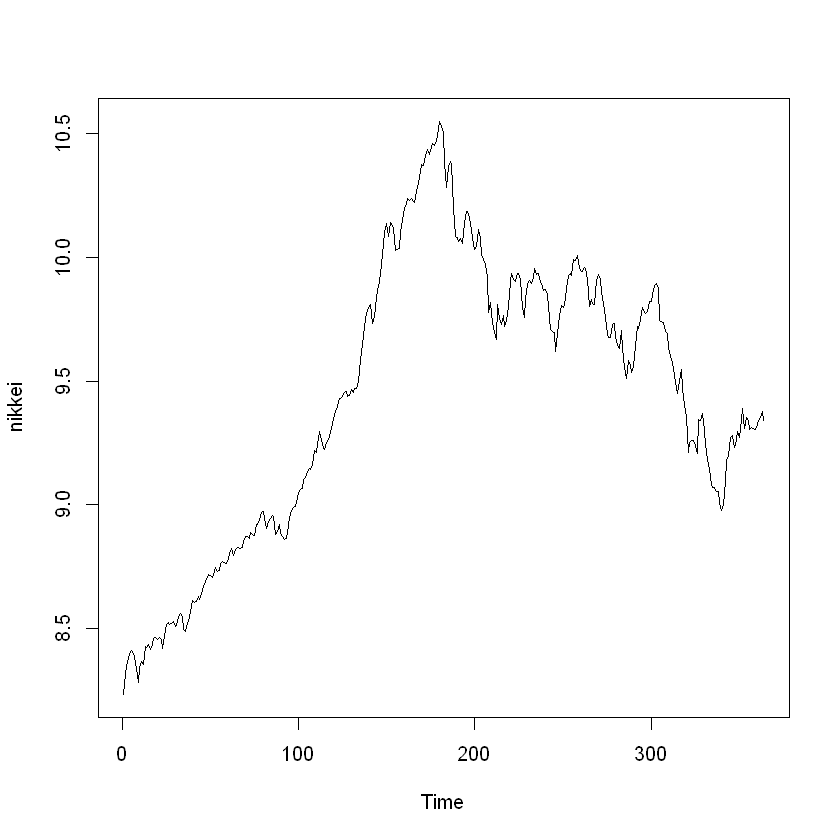

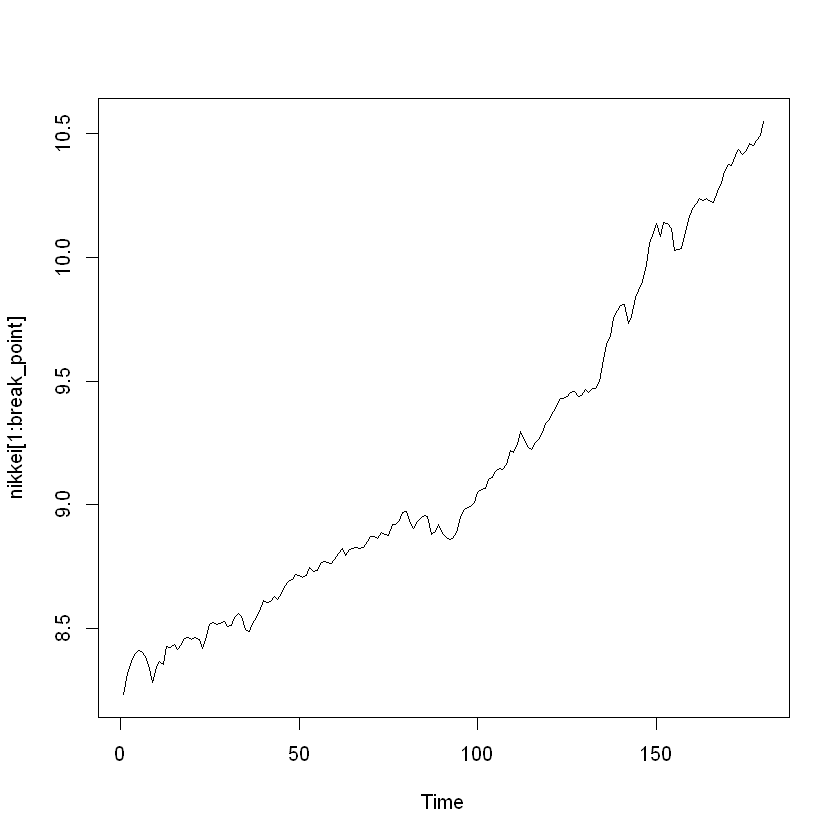

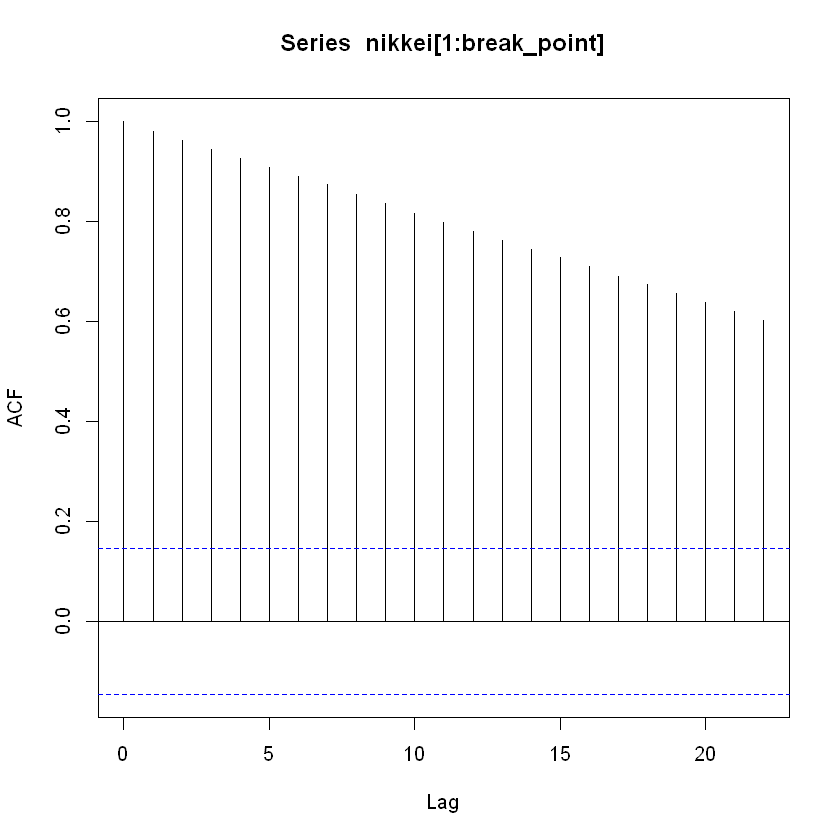

In [2]:
library(urca)
library(broom)
library(tidyverse)
library(purrr)
data_<-read.csv("csvs/economicdata.csv",header=T)
nikkei<-log(data_$nikkei225)
ts.plot(nikkei)
#it seemts obious that nikkei trend had changed at some breaking points
break_point=which(nikkei==max(nikkei))
ts.plot(nikkei[1:break_point])

acf(nikkei[1:break_point])

In [6]:
#TODO:rewroite eficiently with pipe
res_aic<-ur.df(nikkei,"trend",lag=20, "AIC")
#summary(res_aic)
str(res_aic)
#check residual dignosis
resid<-res_aic@res
#res_bic<-ur.df(nikkei,"trend",lag=10, "BIC")
#summary(res_bic)

Formal class 'ur.df' [package "urca"] with 8 slots
  ..@ y        : num [1:364] 8.23 8.32 8.37 8.4 8.41 ...
  ..@ model    : chr "trend"
  ..@ lags     : int 20
  ..@ cval     : num [1:3, 1:3] -3.98 6.15 8.34 -3.42 4.71 6.3 -3.13 4.05 5.36
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:3] "tau3" "phi2" "phi3"
  .. .. ..$ : chr [1:3] "1pct" "5pct" "10pct"
  ..@ res      : Named num [1:343] -0.0222 -0.0461 0.0413 0.0236 -0.015 ...
  .. ..- attr(*, "names")= chr [1:343] "1" "2" "3" "4" ...
  ..@ teststat : num [1, 1:3] -1.16 2 2.67
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr "statistic"
  .. .. ..$ : chr [1:3] "tau3" "phi2" "phi3"
  ..@ testreg  :List of 11
  .. ..$ call         : language lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)
  .. ..$ terms        :Classes 'terms', 'formula'  language z.diff ~ z.lag.1 + 1 + tt + z.diff.lag
  .. .. .. ..- attr(*, "variables")= language list(z.diff, z.lag.1, tt, z.diff.lag)
  .. .. .. ..- attr(*, "factors")= int [1: